https://github.com/RicardDurall/Benchmarking-Strategies-for-Asset-Allocation

Asset Allocation: From Markowitz to Deep Reinforcement Learning


In [ ]:
! pip install --upgrade pandas-datareader
! pip install stable_baselines3

Restart after this



# Preprocessing

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

### Select the tickers and timeframe

In [ ]:
# ! git clone https://github.com/RicardDurall/Benchmarking-Strategies-for-Asset-Allocation

In [ ]:
# ! cp /content/Benchmarking-Strategies-for-Asset-Allocation/deepRL.py /content


In [174]:
tickers = ["URTH", "BNDX", 'AAPL', "GE",'JPM', 'MSFT', 'VOD', 'NKE','NVDA',"MMM"]
# tickers = ['ABB', 'ASSA-B.ST', 'AZN', 'ATCO-A.ST', 'ATCO-B.ST', 'ALIV-SDB.ST', 'BOL.ST',
#            'ELUX-B.ST', 'ERIC-B.ST', 'GETI-B.ST', 'HM-B.ST', 'HEXA-B.ST', 'INVE-B.ST', 'KINV-B.ST',
#            'NDA-SE.ST', 'SAND', 'SECU-B.ST', 'SEB-A.ST', 'SKA-B.ST', 'SKF-B.ST', 'SSAB-A.ST',
#            'SCA-B.ST', 'SHB-A.ST', 'SWED-A.ST', 'SWMA.ST', 'TEL2-B.ST', 'TELIA.ST', 'VOLV-B.ST'   
#            ]

In [ ]:
# tickers = ["URTH", "BNDX"]


In [175]:
# start_date = '2003-01-01'
start_date = '2019-01-01'
end_date = "2022-11-20"
# this is bull market
df = pdr.get_data_yahoo([tickers][0], start=start_date, end=end_date)

In [ ]:
# collective_df =  df['AAPL'], df['GE'], df['JPM'], df['MSFT'], df['VOD'], df['NKE'], df['NVDA'], df['MMM']
# collective_df = df['URTH'], df['BNDX']
# collective_df = df['URTH'], df['BNDX']
# collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]


In [176]:
# bear market 
##  1st of January 2003 to the 1st of January 2010

# bull market
## 2010-01-01 to end="2017-01-01"
data = df.copy()
# we copy the neighbour values to NaN entries
data['Adj Close'] = data['Adj Close'].ffill()
df = df.bfill(axis=1)
data['Adj Close'] = data['Adj Close'].bfill()
df = df.bfill(axis=1)

data = data['Adj Close']
data.head(2)

Symbols,URTH,BNDX,AAPL,GE,JPM,MSFT,VOD,NKE,NVDA,MMM
Date,,,,,,,,,,
2018-12-31,73.949654,49.569229,38.061710,57.33223,86.382889,97.305801,15.073009,71.580444,33.138927,165.238449
2019-01-02,73.959030,49.633190,38.105141,60.96756,87.878349,96.874710,15.416998,71.503220,33.814114,165.594009


In [177]:
data

Symbols,URTH,BNDX,AAPL,GE,JPM,MSFT,VOD,NKE,NVDA,MMM
Date,,,,,,,,,,
2018-12-31,73.949654,49.569229,38.061710,57.332230,86.382889,97.305801,15.073009,71.580444,33.138927,165.238449
2019-01-02,73.959030,49.633190,38.105141,60.967560,87.878349,96.874710,15.416998,71.503220,33.814114,165.594009
2019-01-03,72.721382,49.633190,34.309586,61.043301,86.629456,93.310867,15.354453,70.238464,31.771170,159.358749
2019-01-04,74.934151,49.587505,35.774242,62.330814,89.823082,97.650688,15.659355,72.072845,33.806671,165.914902
2019-01-07,75.281067,49.468719,35.694611,66.193352,89.885521,97.775230,15.776625,73.105927,35.596424,165.533295
...,...,...,...,...,...,...,...,...,...,...
2022-11-14,111.889999,48.180000,148.279999,85.830002,133.910004,240.871185,11.805474,104.389999,162.949997,129.513489
2022-11-15,112.860001,48.459999,150.039993,87.139999,132.940002,241.290009,10.999902,106.709999,166.660004,129.701294
2022-11-16,112.129997,48.700001,148.789993,84.900002,133.119995,241.729996,11.143754,105.230003,159.100006,127.250000


### We check that tehre are no NAN values

In [178]:
data.isna().sum()

Symbols
URTH    0
BNDX    0
AAPL    0
GE      0
JPM     0
MSFT    0
VOD     0
NKE     0
NVDA    0
MMM     0
dtype: int64

### Check if all tickers have the same number of data points

In [179]:
no_datasets = []
for i in tickers:
    no_data_points = len(data[i])
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

data_points_df.head()

,0,1
0,URTH,981
1,BNDX,981
2,AAPL,981
3,GE,981
4,JPM,981


### Define the start-end dates for the training and testing data

In [180]:
train_pct = 0.8
samples_train = int(train_pct*len(data))
data_train = data[:samples_train]
data_test = data[samples_train:]

In [181]:
data_test.head(1)

Symbols,URTH,BNDX,AAPL,GE,JPM,MSFT,VOD,NKE,NVDA,MMM
Date,,,,,,,,,,
2022-02-09,129.82724,53.215946,175.486115,98.919914,152.71843,308.320984,17.620756,145.149445,266.868744,156.983749


### Visualization

In [182]:
data

Symbols,URTH,BNDX,AAPL,GE,JPM,MSFT,VOD,NKE,NVDA,MMM
Date,,,,,,,,,,
2018-12-31,73.949654,49.569229,38.061710,57.332230,86.382889,97.305801,15.073009,71.580444,33.138927,165.238449
2019-01-02,73.959030,49.633190,38.105141,60.967560,87.878349,96.874710,15.416998,71.503220,33.814114,165.594009
2019-01-03,72.721382,49.633190,34.309586,61.043301,86.629456,93.310867,15.354453,70.238464,31.771170,159.358749
2019-01-04,74.934151,49.587505,35.774242,62.330814,89.823082,97.650688,15.659355,72.072845,33.806671,165.914902
2019-01-07,75.281067,49.468719,35.694611,66.193352,89.885521,97.775230,15.776625,73.105927,35.596424,165.533295
...,...,...,...,...,...,...,...,...,...,...
2022-11-14,111.889999,48.180000,148.279999,85.830002,133.910004,240.871185,11.805474,104.389999,162.949997,129.513489
2022-11-15,112.860001,48.459999,150.039993,87.139999,132.940002,241.290009,10.999902,106.709999,166.660004,129.701294
2022-11-16,112.129997,48.700001,148.789993,84.900002,133.119995,241.729996,11.143754,105.230003,159.100006,127.250000


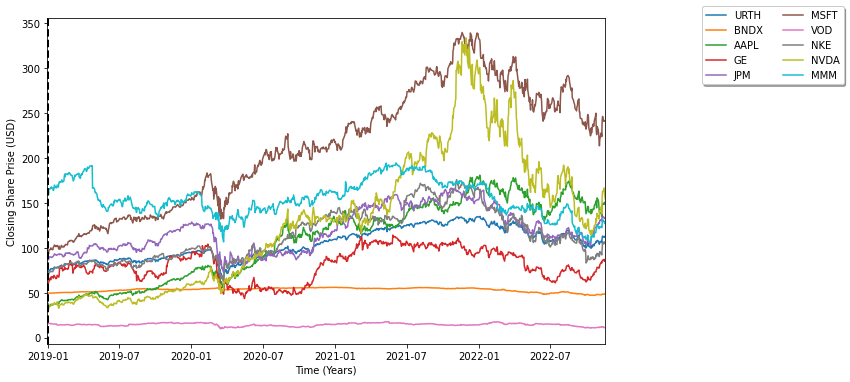

In [183]:
plt.rcParams["figure.figsize"] = (10,6)
for i in tickers:
    plt.plot(data[i], label=i)

# only one line may be specified; full height
plt.axvline(pd.to_datetime(start_date), color='black', linestyle='--', lw=2)
# plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1.05), ncol=2, fancybox=True, shadow=True)
plt.margins(x=0)
plt.ylabel("Closing Share Prise (USD)")
plt.xlabel("Time (Years)")
plt.savefig('data0.png',bbox_inches='tight')

# -----------------------------------------------
# ----------------------------------------------- 

# Evaluating models

## Deep Reinfrocement Learning

In [163]:
# ! copy "Benchmarking-Strategies-for-Asset-Allocation\deepRL.py" ".\"


In [184]:
import numpy as np
import random
from deepRL import StockEnvTrade, train, DRL_prediction
from stable_baselines3.common.vec_env import DummyVecEnv

In [185]:
rebalance_period = 1
re_df = data.iloc[::rebalance_period, :]
train_re_df = data_train.iloc[::rebalance_period, :]
test_re_df = data_test.iloc[::rebalance_period, :]

In [188]:
timesteps = 25000
runs = 3

# timesteps  = 10000
# runs = 3


# timesteps  = 10000
# runs = 1


policy = "MlpPolicy"
length = test_re_df.shape[0]
stocks = test_re_df.shape[1]

### PPO

In [189]:
algo = "PPO"
Cumulative_returns_daily_drl_ppo = np.zeros([runs, length])
portfolio_weights_ppo = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):
    print("started ",i)
    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_ppo[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_ppo[i])
    cont = cont +1
    print("working:",check,"   ",length)
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo[i]),axis=1)
    Cumulative_returns_daily_drl_ppo[i] = (1+return_stocks_ppo).cumprod()
    i = i+1

started  0
Training time:  0.5742735505104065  minutes
working: 197.0     197
started  1
Training time:  0.5945988257726034  minutes
working: 197.0     197
started  2
Training time:  0.5688874125480652  minutes
working: 197.0     197


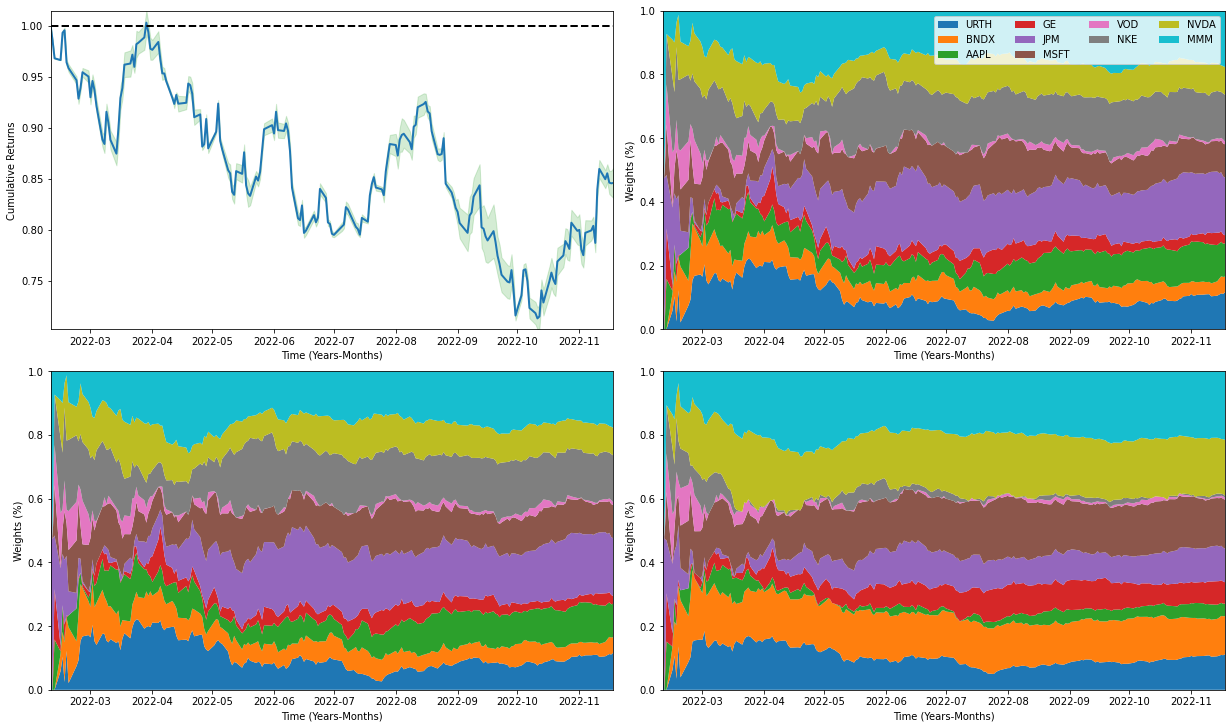

In [190]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

ppo_mean = np.mean(np.array(Cumulative_returns_daily_drl_ppo),axis=0)
ppo_std = np.std(np.array(Cumulative_returns_daily_drl_ppo),axis=0)

axs[0,0].plot(test_re_df.index, ppo_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, ppo_mean - ppo_std, ppo_mean + ppo_std, alpha=0.2, color='tab:green')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ppo_ = np.mean(np.array(portfolio_weights_ppo),axis=0)
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right', ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
axs[1,0].stackplot(test_re_df.index, collective_df, labels=tickers)
# axs[1,0].legend(loc='upper right')
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
df = pd.DataFrame (portfolio_weights_ppo_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[1,1].stackplot(test_re_df.index, collective_df, labels=tickers)
# axs[1,1].legend(loc='upper right')
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")
# plt.show()
plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### A2C

In [191]:
algo = "A2C"
Cumulative_returns_daily_drl_a2c = np.zeros([runs, length])
portfolio_weights_a2c = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_a2c[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_a2c[i]) 
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c[i]),axis=1)
    Cumulative_returns_daily_drl_a2c[i] = (1+return_stocks_a2c).cumprod()
    i = i+1

Training time:  0.6195011496543884  minutes
Training time:  0.5992587844530741  minutes
Training time:  0.6092077414194743  minutes


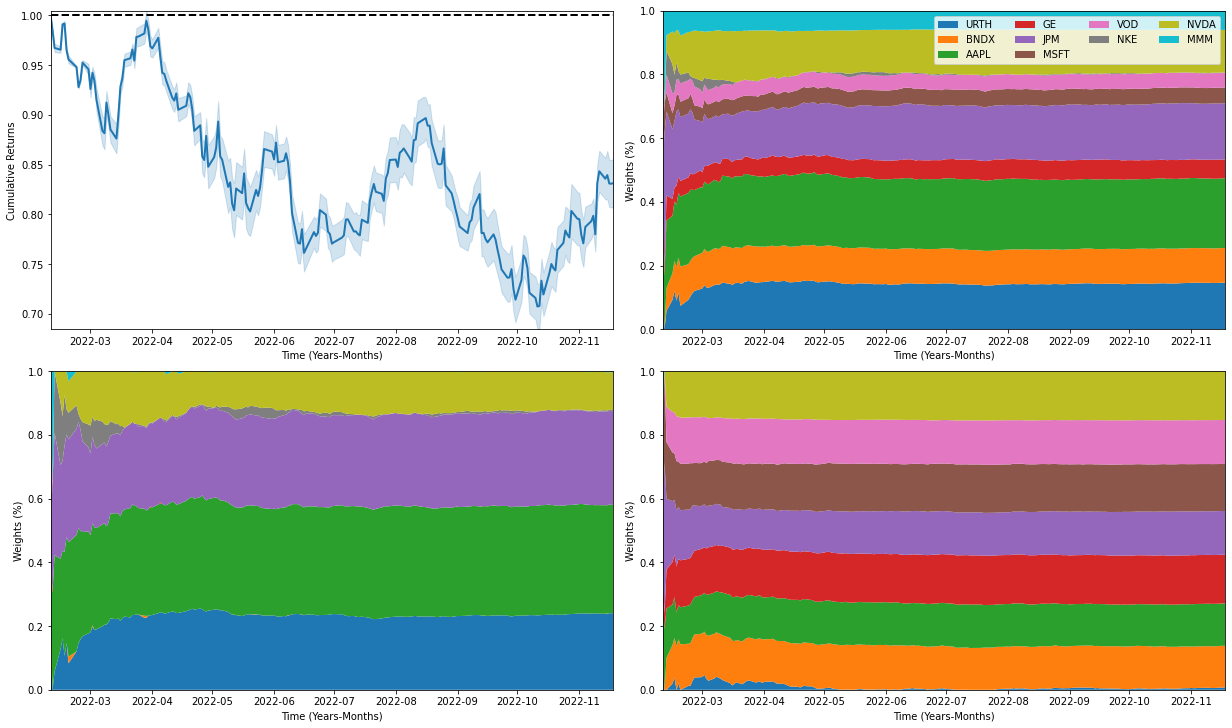

In [192]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

a2c_mean = np.mean(np.array(Cumulative_returns_daily_drl_a2c),axis=0)
a2c_std = np.std(np.array(Cumulative_returns_daily_drl_a2c),axis=0)

axs[0,0].plot(test_re_df.index, a2c_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, a2c_mean - a2c_std, a2c_mean + a2c_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_a2c_ = np.mean(np.array(portfolio_weights_a2c),axis=0)
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[0,1].stackplot(test_re_df.index,collective_df, labels=tickers)
axs[0,1].legend(loc='upper right', ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[1,0].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
df = pd.DataFrame (portfolio_weights_a2c_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[1,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### DDPG

In [193]:
algo = "DDPG"
Cumulative_returns_daily_drl_ddpg = np.zeros([runs, length])
portfolio_weights_ddpg = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_ddpg[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_ddpg[i]) 
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg[i]),axis=1)
    Cumulative_returns_daily_drl_ddpg[i] = (1+return_stocks_ddpg).cumprod()
    i = i+1

Training time:  5.0179273128509525  minutes
Training time:  4.881756484508514  minutes
Training time:  5.142054208119711  minutes


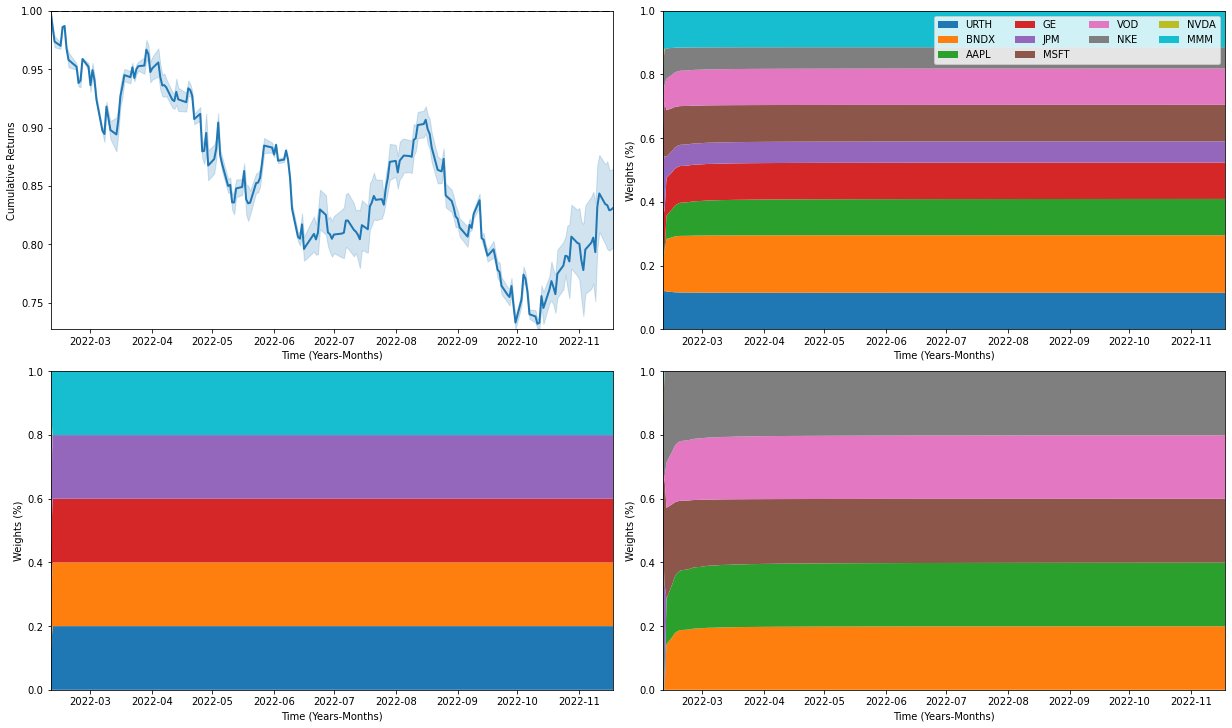

In [194]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

ddpg_mean = np.mean(np.array(Cumulative_returns_daily_drl_ddpg),axis=0)
ddpg_std = np.std(np.array(Cumulative_returns_daily_drl_ddpg),axis=0)

axs[0,0].plot(test_re_df.index, ddpg_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, ddpg_mean - ddpg_std, ddpg_mean + ddpg_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ddgpc_ = np.mean(np.array(portfolio_weights_ddpg),axis=0)
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right',ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_ddgpc_ = portfolio_weights_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[1,0].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_ddgpc_ = portfolio_weights_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
df = pd.DataFrame (portfolio_weights_ddgpc_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[1,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### SAC

In [195]:
algo = "SAC"
Cumulative_returns_daily_drl_sac = np.zeros([runs, length])
portfolio_weights_sac = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_sac[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_sac[i]) 
    cont = cont +1
    if check != length:
        continue
    
    return_stocks = test_re_df.pct_change()
    return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac[i]),axis=1)
    Cumulative_returns_daily_drl_sac[i] = (1+return_stocks_sac).cumprod()
    i = i+1

Training time:  8.335425817966462  minutes
Training time:  8.530499267578126  minutes
Training time:  8.586304752031962  minutes


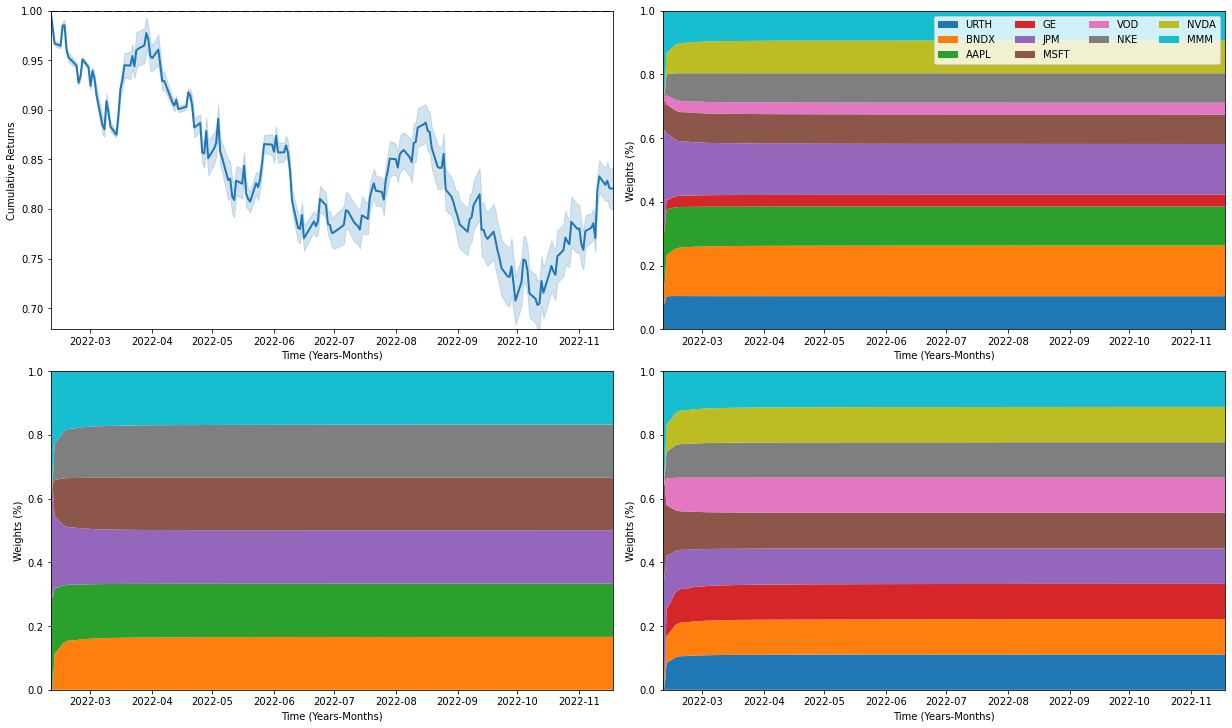

In [196]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

sac_mean = np.mean(np.array(Cumulative_returns_daily_drl_sac),axis=0)
sac_std = np.std(np.array(Cumulative_returns_daily_drl_sac),axis=0)

axs[0,0].plot(test_re_df.index, sac_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, sac_mean - sac_std, sac_mean + sac_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_sac_ = np.mean(np.array(portfolio_weights_sac),axis=0)
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right', ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_sac_ = portfolio_weights_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[1,0].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_sac_ = portfolio_weights_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
df = pd.DataFrame (portfolio_weights_sac_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[1,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

### TD3

In [197]:
algo = "TD3"
Cumulative_returns_daily_drl_td3 = np.zeros([runs, length])
portfolio_weights_td3 = np.zeros([runs, length, stocks])

i=0
cont=0
while (i<runs):

    train_env = DummyVecEnv([lambda: StockEnvTrade(df = train_re_df)])
    model = train(algo, policy, train_env, timesteps, seed=cont, save=False)

    test_env = DummyVecEnv([lambda: StockEnvTrade(df = test_re_df)])
    test_obs = test_env.reset()

    portfolio_weights_td3[i] = np.array(DRL_prediction(model, test_re_df, test_env, test_obs))
    
    check = np.sum(portfolio_weights_td3[i])
    cont = cont +1
    if check != length:
        continue

    return_stocks = test_re_df.pct_change()
    return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3[i]),axis=1)
    Cumulative_returns_daily_drl_td3[i] = (1+return_stocks_td3).cumprod()
    i = i+1

Training time:  5.223485442002614  minutes
Training time:  5.21903102795283  minutes
Training time:  5.2735176602999365  minutes
Training time:  5.277518598238627  minutes


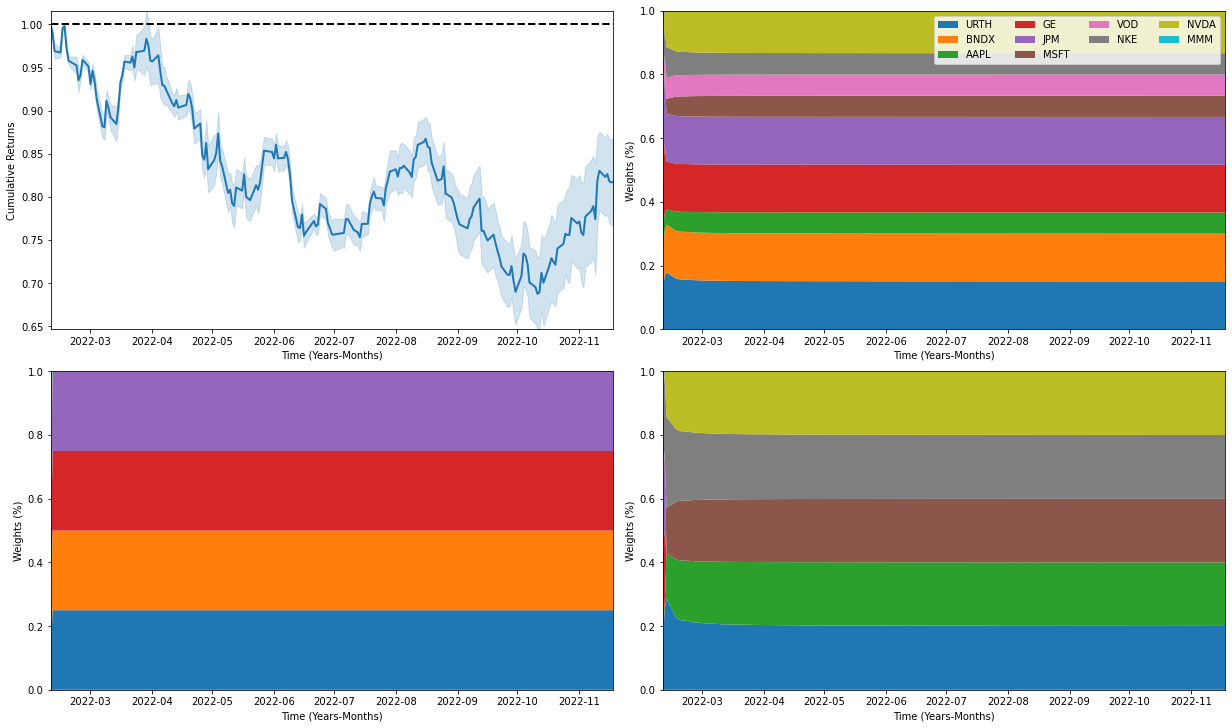

In [198]:
fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

td3_mean = np.mean(np.array(Cumulative_returns_daily_drl_td3),axis=0)
td3_std = np.std(np.array(Cumulative_returns_daily_drl_td3),axis=0)

axs[0,0].plot(test_re_df.index, td3_mean, color='tab:blue', linewidth =2.0)
axs[0,0].fill_between(test_re_df.index, td3_mean - td3_std, td3_mean + td3_std, alpha=0.2, color='tab:blue')
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].axhline(1, color='black', linestyle='--', lw=2)
axs[0,0].set_ylabel("Cumulative Returns")
axs[0,0].set_xlabel("Time (Years-Months)")

portfolio_weights_td3_ = np.mean(np.array(portfolio_weights_td3),axis=0)
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right',ncol=4)
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

portfolio_weights_td3_ = portfolio_weights_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[1,0].stackplot(test_re_df.index,collective_df, labels=tickers)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

portfolio_weights_td3_ = portfolio_weights_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
df = pd.DataFrame (portfolio_weights_td3_, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[1,1].stackplot(test_re_df.index,collective_df, labels=tickers)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")

plt.savefig(algo+'_'+str(timesteps)+'_'+str(rebalance_period)+'_drl0.png',bbox_inches='tight')

## Traditional approaches

In [199]:
! pip install pyportfolioopt

In [200]:
! pip install Riskfolio-Lib

In [201]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, objective_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import riskfolio as rp

In [202]:
# working days in a year 252
window = 50
start = len(train_re_df)-window
data = re_df.iloc[start:]
data = data.reset_index(drop=True)

### Min-Variance Portfolio Allocation

In [203]:
portfolio_weights_min_var = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var.shape[0]):    
    sel = data.iloc[i:window+i]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S)
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True,
        )

    portfolio_weights_min_var[idx]=np.array([weights[j] for j in tickers])
    idx +=1

D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Text(0.5, 0, 'Time (Years-Months)')

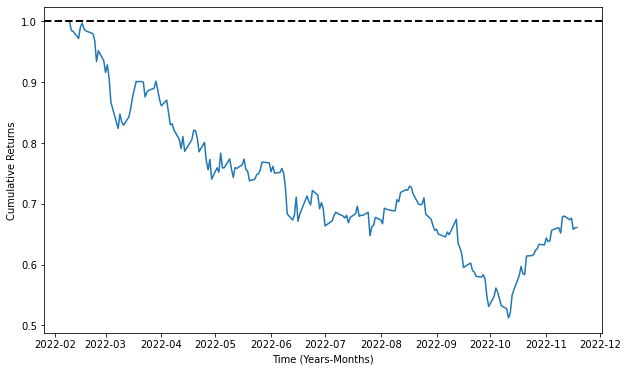

In [204]:
return_stocks = test_re_df.pct_change()
return_stocks_min_var = np.sum(return_stocks.multiply(portfolio_weights_min_var),axis=1)
Cumulative_returns_daily_min_var = (1+return_stocks_min_var).cumprod()
plt.plot(Cumulative_returns_daily_min_var)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

Text(0.5, 0, 'Time (Years-Months)')

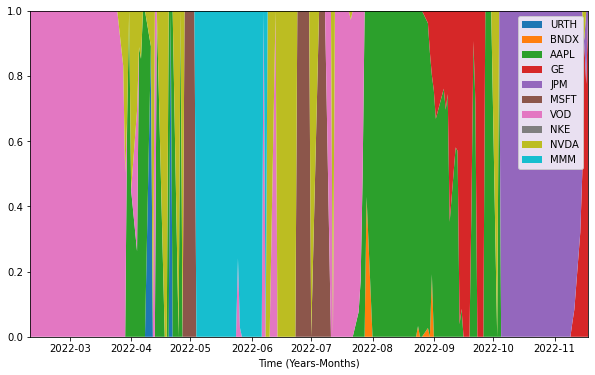

In [205]:
df = pd.DataFrame (portfolio_weights_min_var, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
plt.stackplot(test_re_df.index, collective_df, labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

### Min volatility

In [206]:
portfolio_weights_min_vol = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_vol.shape[0]):    
    sel = data.iloc[i:window+i]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S)  
    weights = ef.min_volatility() 
   
    portfolio_weights_min_vol[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

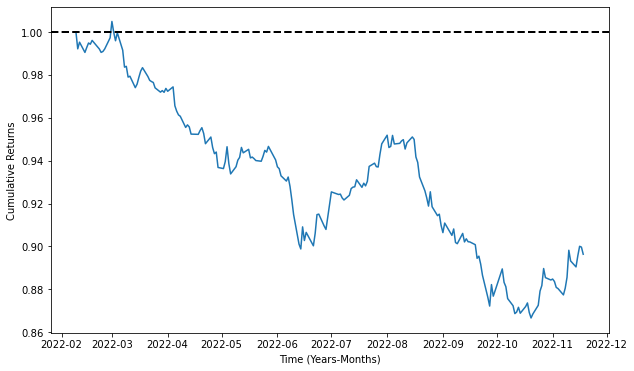

In [207]:
return_stocks_min_vol = np.sum(return_stocks.multiply(portfolio_weights_min_vol),axis=1)
Cumulative_returns_daily_min_vol = (1+return_stocks_min_vol).cumprod()
plt.plot(Cumulative_returns_daily_min_vol)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

Text(0.5, 0, 'Time (Years-Months)')

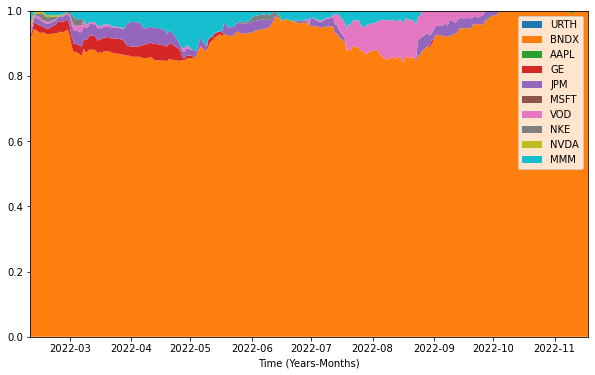

In [208]:
df = pd.DataFrame (portfolio_weights_min_vol, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
plt.stackplot(test_re_df.index, collective_df, labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

### Risk Parity

In [209]:
portfolio_weights_risk = np.zeros([test_re_df.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_risk.shape[0]):    
    sel = data.iloc[i:window+i]
   
    # Building the portfolio object
    port = rp.Portfolio(returns=sel)

    # Calculating optimal portfolio
    # Select method and estimate input parameters:
    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.

    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

    model='Classic' # Could be Classic (historical) or FM (Factor Model)
    rm = 'MV' # Risk measure used, this time will be variance
    hist = True # Use historical scenarios for risk measures that depend on scenarios
    rf = 0 # Risk free rate
    b = None # Risk contribution constraints vector
    weights = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)
   
    portfolio_weights_risk[idx]=np.squeeze(np.array(weights))
    idx +=1  

D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another 

D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another 

D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another 

D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another 

D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
D:\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another 

Text(0.5, 0, 'Time (Years-Months)')

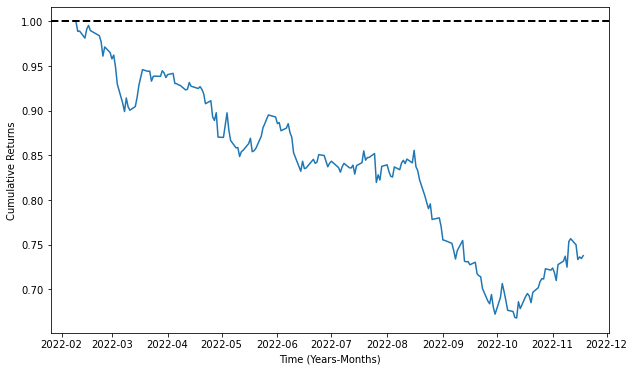

In [210]:
return_stocks = test_re_df.pct_change()
return_stocks_risk = np.sum(return_stocks.multiply(portfolio_weights_risk),axis=1)
Cumulative_returns_daily_risk = (1+return_stocks_risk).cumprod()
plt.plot(Cumulative_returns_daily_risk)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

Text(0.5, 0, 'Time (Years-Months)')

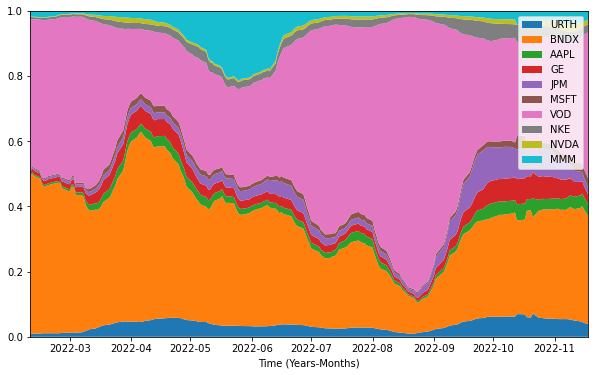

In [211]:
df = pd.DataFrame (portfolio_weights_risk, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
plt.stackplot(test_re_df.index,collective_df, labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

### Equal weighting

In [212]:
portfolio_weights_equal = np.ones([test_re_df.shape[0],test_re_df.shape[1]])/test_re_df.shape[1]

Text(0.5, 0, 'Time (Years-Months)')

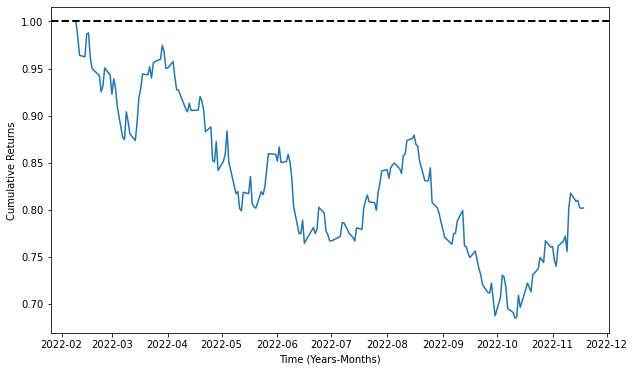

In [213]:
return_stocks = test_re_df.pct_change()
return_stocks_equal = np.sum(return_stocks.multiply(portfolio_weights_equal),axis=1)
Cumulative_returns_daily_equal = (1+return_stocks_equal).cumprod()
plt.plot(Cumulative_returns_daily_equal)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

Text(0.5, 0, 'Time (Years-Months)')

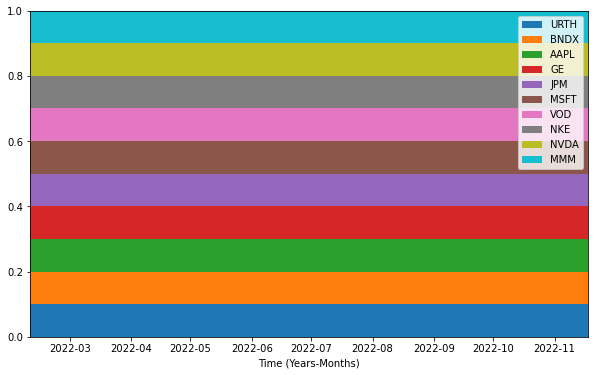

In [214]:
df = pd.DataFrame (portfolio_weights_equal, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
plt.stackplot(test_re_df.index,collective_df, labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

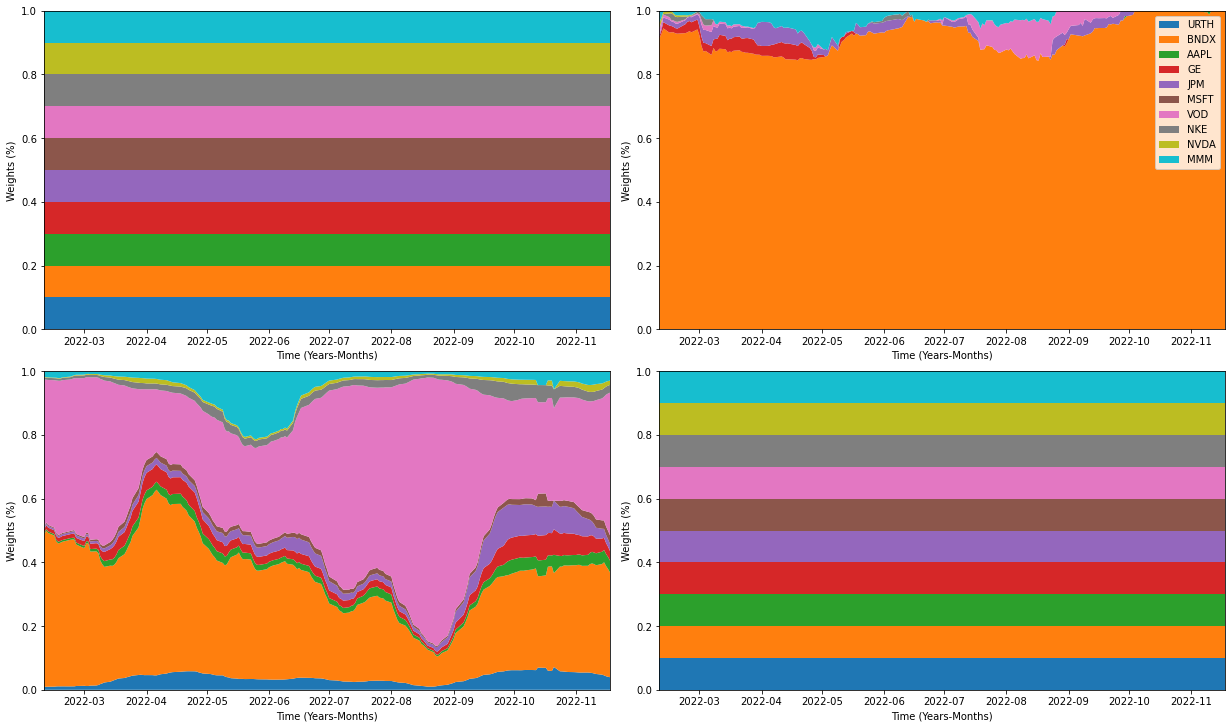

In [215]:

fig, axs = plt.subplots(2, 2, figsize=(17,10),constrained_layout=True)

df = pd.DataFrame (portfolio_weights_min_var, index = test_re_df.index, columns = tickers)
# axs[0,0].stackplot(test_re_df.index, df['AAPL'], df['GE'], df['JPM'], df['MSFT'], df['VOD'], df['NKE'], df['NVDA'], df['MMM'])
axs[0,0].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,0].margins(x=0)
axs[0,0].margins(y=0)
axs[0,0].set_ylabel("Weights (%)")
axs[0,0].set_xlabel("Time (Years-Months)")

df = pd.DataFrame (portfolio_weights_min_vol, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[0,1].stackplot(test_re_df.index, collective_df, labels=tickers)
axs[0,1].legend(loc='upper right')
axs[0,1].margins(x=0)
axs[0,1].margins(y=0)
axs[0,1].set_ylabel("Weights (%)")
axs[0,1].set_xlabel("Time (Years-Months)")

df = pd.DataFrame (portfolio_weights_risk, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[1,0].stackplot(test_re_df.index, collective_df)
axs[1,0].margins(x=0)
axs[1,0].margins(y=0)
axs[1,0].set_ylabel("Weights (%)")
axs[1,0].set_xlabel("Time (Years-Months)")

df = pd.DataFrame (portfolio_weights_equal, index = test_re_df.index, columns = tickers)
collective_df = df["URTH"], df["BNDX"], df['AAPL'], df["GE"],df['JPM'], df['MSFT'], df['VOD'], df['NKE'],df['NVDA'],df["MMM"]
axs[1,1].stackplot(test_re_df.index, collective_df)
axs[1,1].margins(x=0)
axs[1,1].margins(y=0)
axs[1,1].set_ylabel("Weights (%)")
axs[1,1].set_xlabel("Time (Years-Months)")


plt.savefig('traditional0.png',bbox_inches='tight')

## Plotting all cumulative returns mtogether

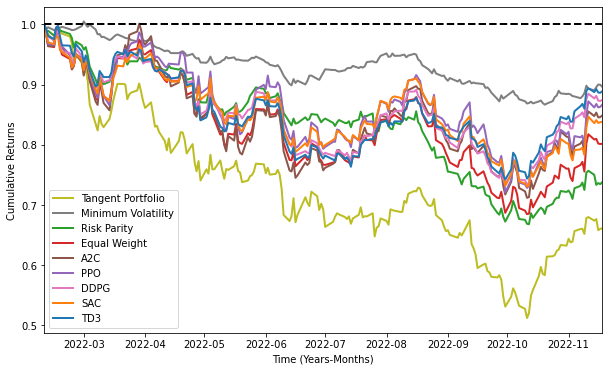

In [216]:
x = Cumulative_returns_daily_equal.index.values

plt.plot(x, Cumulative_returns_daily_min_var, color='tab:olive', label="Tangent Portfolio", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='tab:gray', label="Minimum Volatility", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='tab:green', label="Risk Parity", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='tab:red', label="Equal Weight", linewidth =2.0)

a2c = Cumulative_returns_daily_drl_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)

plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_max0.png',bbox_inches='tight')

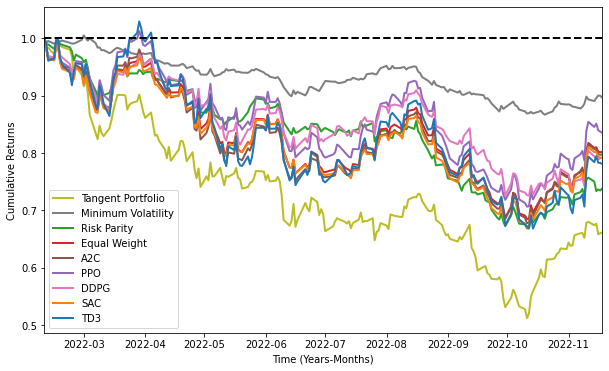

In [217]:
x = Cumulative_returns_daily_equal.index.values

plt.plot(x, Cumulative_returns_daily_min_var, color='tab:olive', label="Tangent Portfolio", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='tab:gray', label="Minimum Volatility", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='tab:green', label="Risk Parity", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='tab:red', label="Equal Weight", linewidth =2.0)

a2c = Cumulative_returns_daily_drl_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = Cumulative_returns_daily_drl_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = Cumulative_returns_daily_drl_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = Cumulative_returns_daily_drl_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = Cumulative_returns_daily_drl_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)

plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_min0.png',bbox_inches='tight')

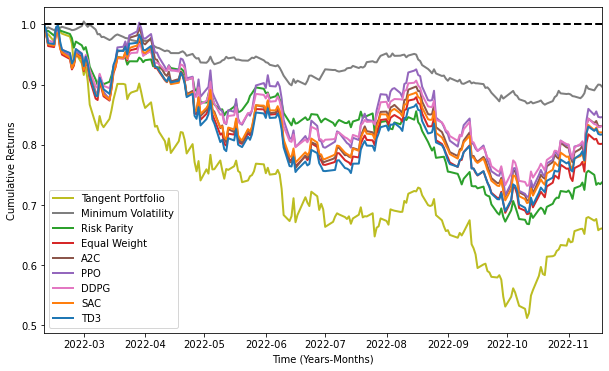

In [218]:
# portfolio_weights_td3_ = np.mean(np.array(portfolio_weights_td3),axis=0)
x = Cumulative_returns_daily_equal.index.values

plt.plot(x, Cumulative_returns_daily_min_var, color='tab:olive', label="Tangent Portfolio", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_min_vol, color='tab:gray', label="Minimum Volatility", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_risk, color='tab:green', label="Risk Parity", linewidth =2.0)
plt.plot(x, Cumulative_returns_daily_equal, color='tab:red', label="Equal Weight", linewidth =2.0)

a2c = np.mean(np.array(Cumulative_returns_daily_drl_a2c),axis=0)
plt.plot(x, a2c, color='tab:brown', label='A2C', linewidth =2.0)
ppo = np.mean(np.array(Cumulative_returns_daily_drl_ppo),axis=0)
plt.plot(x, ppo, color='tab:purple', label='PPO', linewidth =2.0)
ddpg = np.mean(np.array(Cumulative_returns_daily_drl_ddpg), axis = 0)
plt.plot(x, ddpg, color='tab:pink', label='DDPG', linewidth =2.0)
sac = np.mean(np.array(Cumulative_returns_daily_drl_sac), axis = 0)
plt.plot(x, sac, color='tab:orange', label='SAC', linewidth =2.0)
td3 = np.mean(np.array(Cumulative_returns_daily_drl_td3), axis=0)
plt.plot(x, td3, color='tab:blue', label='TD3', linewidth =2.0)
x
plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()
plt.savefig(str(rebalance_period)+'_cumulative_returns_average0.png',bbox_inches='tight')

In [219]:
portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmax(Cumulative_returns_daily_drl_ppo[:,-1])]
return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo_),axis=1)

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmax(Cumulative_returns_daily_drl_a2c[:,-1])]
return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c_),axis=1)

portfolio_weights_ddpg_ = portfolio_weights_ddpg[np.argmax(Cumulative_returns_daily_drl_ddpg[:,-1])]
return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg_),axis=1)

portfolio_weights_sac_ = portfolio_weights_sac[np.argmax(Cumulative_returns_daily_drl_sac[:,-1])]
return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac_),axis=1)

portfolio_weights_td3_ = portfolio_weights_td3[np.argmax(Cumulative_returns_daily_drl_td3[:,-1])]
return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3_),axis=1)

In [220]:
portfolio_weights_ppo_ = portfolio_weights_ppo[np.argmin(Cumulative_returns_daily_drl_ppo[:,-1])]
return_stocks_ppo = np.sum(return_stocks.multiply(portfolio_weights_ppo_),axis=1)

portfolio_weights_a2c_ = portfolio_weights_a2c[np.argmin(Cumulative_returns_daily_drl_a2c[:,-1])]
return_stocks_a2c = np.sum(return_stocks.multiply(portfolio_weights_a2c_),axis=1)

portfolio_weights_ddpg_ = portfolio_weights_ddpg[np.argmin(Cumulative_returns_daily_drl_ddpg[:,-1])]
return_stocks_ddpg = np.sum(return_stocks.multiply(portfolio_weights_ddpg_),axis=1)

portfolio_weights_sac_ = portfolio_weights_sac[np.argmin(Cumulative_returns_daily_drl_sac[:,-1])]
return_stocks_sac = np.sum(return_stocks.multiply(portfolio_weights_sac_),axis=1)

portfolio_weights_td3_ = portfolio_weights_td3[np.argmin(Cumulative_returns_daily_drl_td3[:,-1])]
return_stocks_td3 = np.sum(return_stocks.multiply(portfolio_weights_td3_),axis=1)

In [221]:
return_stocks_ppo
return_stocks_a2c
return_stocks_ddpg
return_stocks_sac
return_stocks_td3
return_stocks_min_var
return_stocks_min_vol
return_stocks_risk
return_stocks_equal
print("")

## Other statistics

In [222]:
! pip install pyfolio

In [223]:
import pyfolio

In [224]:
with pyfolio.plotting.plotting_context(font_scale=1.1): pyfolio.create_full_tear_sheet(returns = return_stocks_ppo, set_context=False)

D:\anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2022-02-09
End date,2022-11-18
Total months,9
,Backtest
Annual return,-20.6%
Cumulative returns,-16.5%
Annual volatility,28.3%
Sharpe ratio,-0.68
Calmar ratio,-0.68
Stability,0.64
Max drawdown,-30.3%


IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
! shutdown -s -t 60